In [1]:
# importing some of the necessary libraries

# computation
import pandas as pd
import numpy as np
from pandas import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# allowing plots to appear directly in the notebook
%matplotlib inline


In [2]:
# obtain and convert data into data frame

import glob
path='\\Users\\Laurentia\\Downloads\\201307-201402-citibike-tripdata (1)'
all_files = glob.glob(path + "/*data.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
5562316,848,2014-02-28 23:57:13,2014-03-01 00:11:21,498,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,17413,Subscriber,1976,1
5562317,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,470,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,15608,Subscriber,1985,2
5562318,304,2014-02-28 23:58:17,2014-03-01 00:03:21,497,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,17112,Subscriber,1968,1
5562319,308,2014-02-28 23:59:10,2014-03-01 00:04:18,353,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,14761,Subscriber,1982,1
5562320,603,2014-02-28 23:59:47,2014-03-01 00:09:50,252,MacDougal St & Washington Sq,40.732264,-73.998522,475,E 16 St & Irving Pl,40.735243,-73.987586,18783,Subscriber,1960,1


In [3]:
# data formatting

frame.columns=['Trip Duration','Start Time and Date', 'Stop Time and Date','Start Station ID','Start Station Name','Start Station Lat','Start Station Long','End Station ID','End Station Name','End Station Lat','End Station Long','Bike ID','User Type','Birth Year','Gender']
frame['Gender']=frame['Gender'].apply({0:'Unknown',1:'Male', 2:'Female'}.get)
frame.head()

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,Unknown
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,Unknown
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,Female
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,Unknown
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,Male


In [4]:
# describing the data set to get some insights into the data
round(frame.describe(),2)

,Trip Duration,Start Station ID,Start Station Lat,Start Station Long,End Station ID,End Station Lat,End Station Long,Bike ID
count,5562321.00,5562321.00,5562321.00,5562321.00,5562321.00,5562321.00,5562321.00,5562321.00
mean,878.81,439.29,40.73,-73.99,439.67,40.73,-73.99,17683.72
std,3996.94,341.86,0.02,0.01,346.77,0.02,0.01,1761.23
min,60.00,72.00,40.68,-74.02,72.00,40.68,-74.02,14529.00
25%,398.00,304.00,40.72,-74.00,303.00,40.72,-74.00,16167.00
50%,634.00,403.00,40.74,-73.99,402.00,40.74,-73.99,17682.00
75%,1042.00,486.00,40.75,-73.98,484.00,40.75,-73.98,19177.00
max,6250750.00,3002.00,40.77,-73.95,3002.00,40.77,-73.95,21542.00


In [5]:
# checking data type
frame.dtypes

Trip Duration            int64
Start Time and Date     object
Stop Time and Date      object
Start Station ID         int64
Start Station Name      object
Start Station Lat      float64
Start Station Long     float64
End Station ID           int64
End Station Name        object
End Station Lat        float64
End Station Long       float64
Bike ID                  int64
User Type               object
Birth Year              object
Gender                  object
dtype: object

In [6]:
# data pre-processing

# correcting data types
import datetime as dt

frame['Start Time and Date'] = pd.to_datetime(frame['Start Time and Date'])
frame['Stop Time and Date'] = pd.to_datetime(frame['Stop Time and Date']) 
frame['Start Station Name'] = frame['Start Station Name'].astype('category')
frame['End Station Name'] = frame['End Station Name'].astype('category')
frame['User Type'] = frame['User Type'].astype('category')
frame['Gender'] = frame['Gender'].astype('category')

round(df.describe(),2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.00,224736.00,224736.00,224736.00,224736.00,224736.00,224736.00,224736.00,224736.00
mean,874.52,439.20,40.73,-73.99,440.74,40.73,-73.99,18010.60,1.15
std,5486.09,335.72,0.02,0.01,341.50,0.02,0.01,1987.77,0.44
min,60.00,72.00,40.68,-74.02,72.00,40.68,-74.02,14529.00,0.00
25%,360.00,305.00,40.72,-74.00,305.00,40.72,-74.00,16302.00,1.00
50%,544.00,403.00,40.74,-73.99,403.00,40.74,-73.99,17975.00,1.00
75%,845.00,490.00,40.75,-73.98,488.00,40.75,-73.98,19689.00,1.00
max,766108.00,3002.00,40.77,-73.95,3002.00,40.77,-73.95,21542.00,2.00


In [7]:
# adjusting the data in the 'Birth Year' column 
frame['Birth Year']= frame['Birth Year'].replace('\\N', np.nan)

In [8]:
#checking for missing data in the entire dataframe

def missing_data(frame):
    total = frame.isnull().sum().sort_values(ascending=False)
    percent = (frame.isnull().sum()/frame.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(frame)

,Total,Percent
Birth Year,680837,12.24016
Gender,0,0.00000
User Type,0,0.00000
Bike ID,0,0.00000
End Station Long,0,0.00000
End Station Lat,0,0.00000
End Station Name,0,0.00000
End Station ID,0,0.00000
Start Station Long,0,0.00000
Start Station Lat,0,0.00000


~12% of Birth Year data is missing. As it is not a considerable proportion of the data available, I have chosen to replace the null values with the mode (the most common birth year).

In [9]:
#dealing with missing data
#replacing the null values in the 'Birth Year' column with mode

frame['Birth Year'].fillna(frame['Birth Year'].mode()[0], inplace=True)
frame.head()

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,1983,Unknown
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,1983,Unknown
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,Female
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,1983,Unknown
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,Male


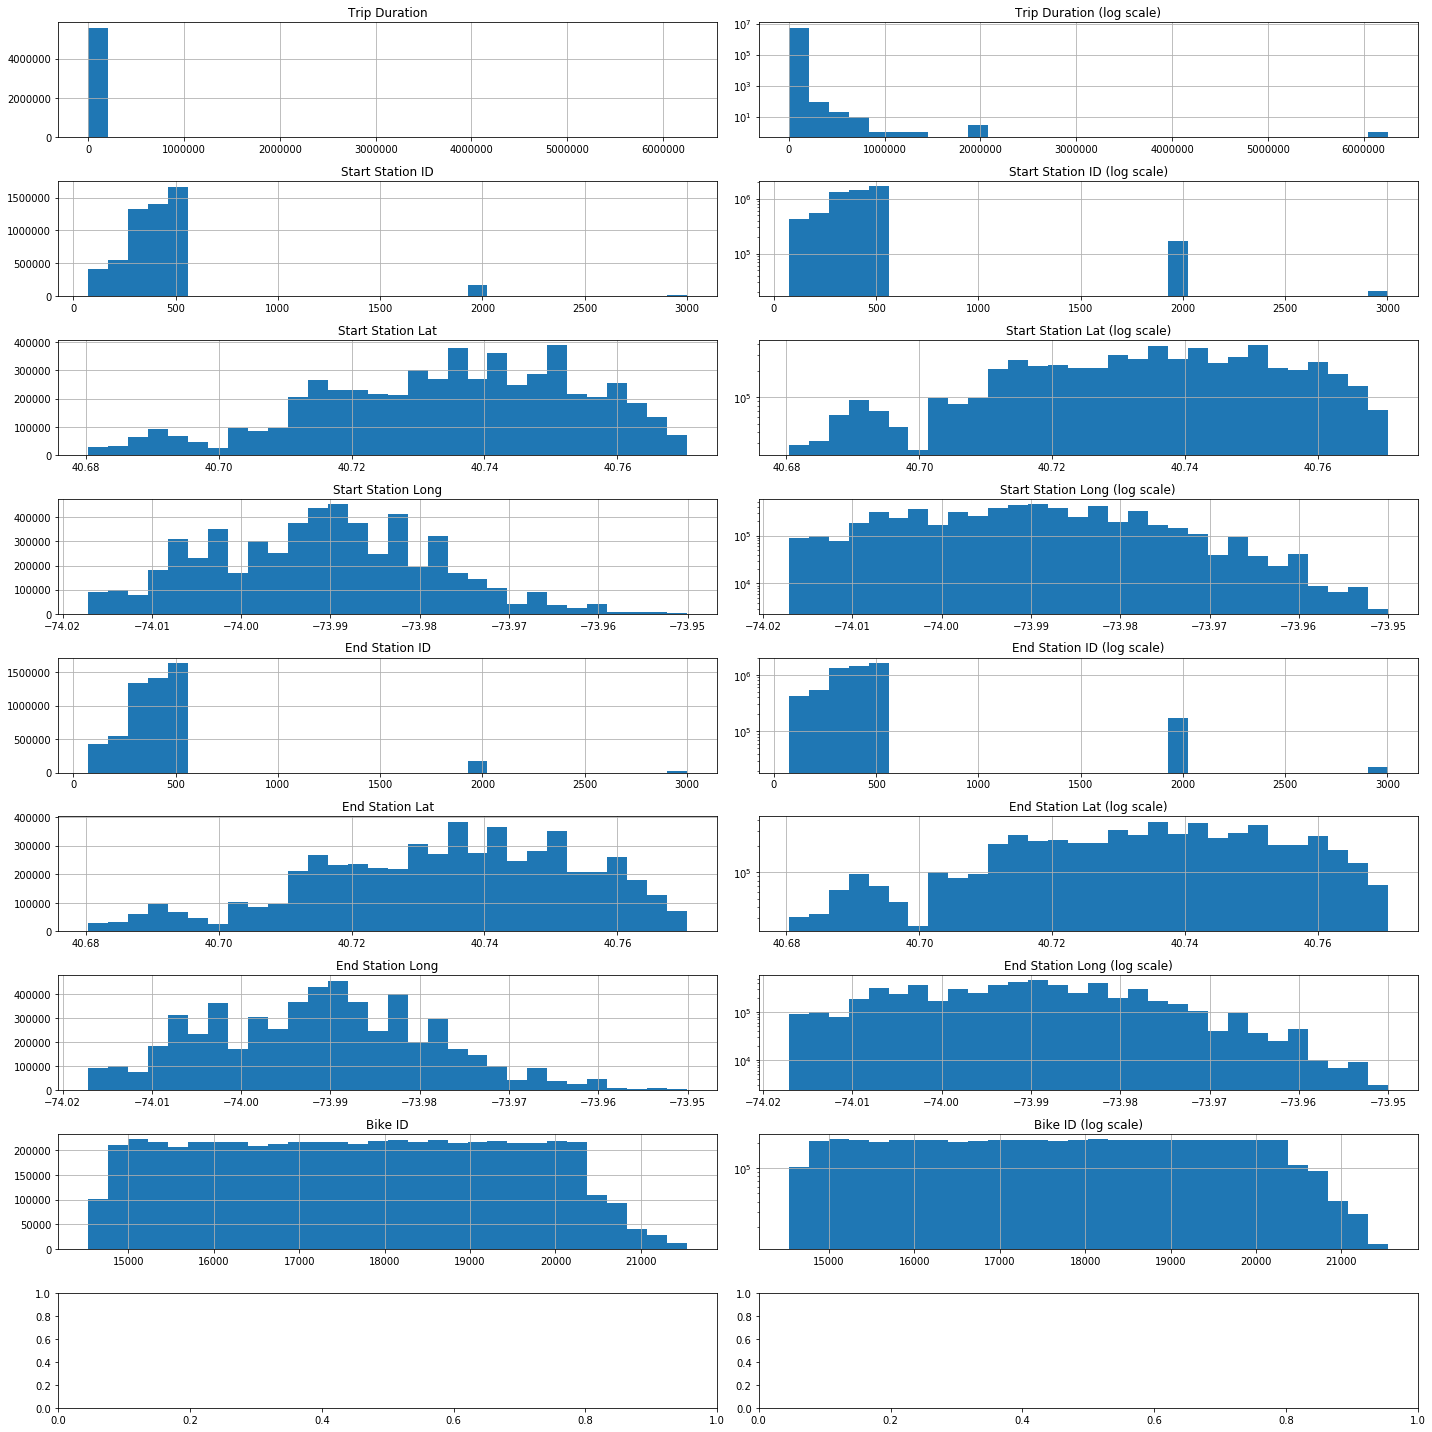

In [10]:
#detecting and eliminating anomalies
    
#plotting histograms on numeric values 
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20,20))

i = 1
for col in frame.columns:
    if frame[col].dtype == np.float64 or frame[col].dtype == np.int64:
        ax = plt.subplot(9, 2, i)
        frame[col].hist(bins=30)
        ax.set_title(col)
        i += 1
        ax = plt.subplot(9, 2, i)
        frame[col].hist(bins=30)
        ax.set_title(col+" (log scale)")
        ax.set_yscale('log')
        i += 1

fig.tight_layout()
plt.show()

#### We can observe the following anomaly:

The longest trip lasted longer than 6.000.000 seconds, which is equivalent to 72 days. It is very uncommon for a person to rent a citibike for such a long time. 

Moreover, according to Citi Bikes’ website: The first 45 minutes of each ride is included for Annual Members(aka *Subscribers*), and the first 30 minutes of each ride is included for Day Pass users(aka *Customers*). Further usage is priced at $4 for each additional 15 minutes.

It’s safe to assume, no one (or very few people) will be willing to rent a bike for more than 2 hours. If they did, it would cost them an additional 20 dollars  if they are subscribers and 24 dollars  if they're customers, which would be considered a too pricey bike trip. A solution is for the riders to change bikes more often, which would be possible given the large number of stations thoughout the city. Any trip which lasts longer than 2 hours (7,200 seconds) probably indicates a stolen bike, an anomaly, or incorrect docking of the bike. 

Thus, we can deal with this by removing any records which have a trip duration longer than 2 hours or 7200 seconds.

In [11]:
#dropping records with duration longer than 2 hours
frame = frame.drop(frame.index[(frame['Trip Duration'] > 7200)])

We can further remove trips which lasted less than 237 seconds (25% quartile) and where *start station == end station*. This could be due to the fact that the rented bike was broken. We assume that this is how long it would take a rider to realize a bike isn’t working properly and to come back to the station to exchange ir for a new one.

In [12]:
#dropping records where the trip lasted less than 237s and start station==end station
frame = frame.drop(frame.index[(frame['Trip Duration'] < 237) & 
                          (frame['Start Station Lat'] == frame['End Station Lat'])& (frame['Start Station Long'] == frame['End Station Long'])])
frame.head()

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,1983,Unknown
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,1983,Unknown
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,Female
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,1983,Unknown
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,Male


We can also vizualize all stations on map to see if there is any unusual location.

In [13]:
#checking if station id matches station name

x1 = len(frame['Start Station ID'].unique())
y1 = len(frame[['Start Station ID', 'Start Station Name']].drop_duplicates())
x2 = len(frame['End Station ID'].unique())
y2 = len(frame[['End Station ID', 'End Station Name']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [14]:
#checking if station id matches station latitude

x1 = len(frame['Start Station ID'].unique())
y2 = len(frame[['Start Station ID', 'Start Station Lat']].drop_duplicates())
x2 = len(frame['End Station ID'].unique())
y2 = len(frame[['End Station ID', 'End Station Lat']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [15]:
#checking if station id matches station longitude

x1 = len(frame['Start Station ID'].unique())
y2 = len(frame[['Start Station ID', 'Start Station Long']].drop_duplicates())
x2 = len(frame['End Station ID'].unique())
y2 = len(frame[['End Station ID', 'End Station Long']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [16]:
#preparing data for the visualization below
t1 = frame[['Start Station ID', 'Start Station Name', 'Start Station Lat', 'Start Station Long']] \
            .drop_duplicates().rename(columns = {'Start Station ID':'Station ID', \
                                                 'Start Station Name':'Station Name', \
                                                 'Start Station Lat':'Station Lat', 
                                                 'Start Station Long': 'Station Long'})
t2 = frame[['End Station ID', 'End Station Name', 'End Station Lat', 'End Station Long']] \
        .drop_duplicates().rename(columns = {'End Station ID':'Station ID', \
                                             'End Station Name':'Station Name', \
                                             'End Station Lat':'Station Lat', \
                                             'End Station Long': 'Station Long'})
frame_loc = pd.concat([t1, t2]).drop_duplicates()

In [17]:

pip install C:\Users\Laurentia\Downloads\basemap-1.2.1-cp37-cp37m-win_amd64.whl

Note: you may need to restart the kernel to use updated packages.


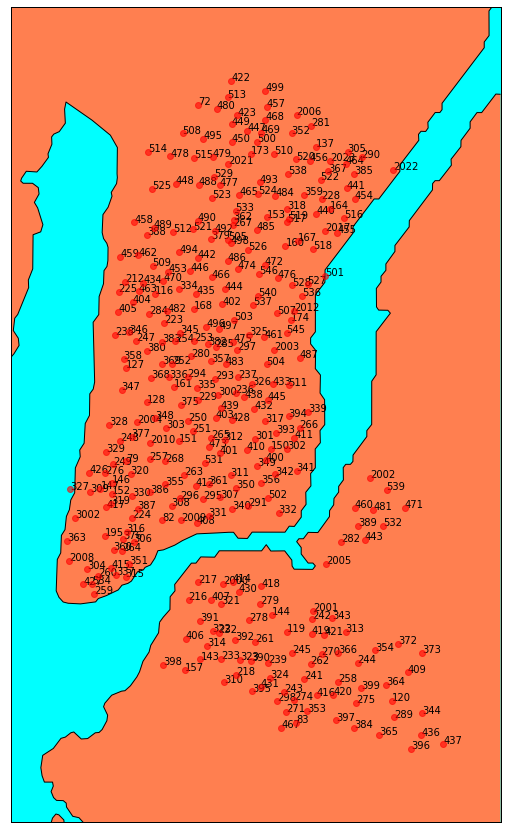

In [18]:
from mpl_toolkits.basemap import Basemap

# Initialize plots
fig, ax = plt.subplots(figsize=(15,15))

# determine range to print based on min, max lat and lon of the data
lat = list(frame_loc['Station Lat'])
lon = list(frame_loc['Station Long'])
text = list(frame_loc['Station ID'])
margin = 0.01 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='lcc',
            resolution = 'f',)

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawrivers()


# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)

# plot points as red dots
ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6)
for i in range(frame_loc.shape[0]):
    plt.text(lons[i], lats[i], text[i])
plt.show()

There are no unusual location or outliers on the map. Further checks can be done by accessing [Citibike's official stations list](https://feeds.citibikenyc.com/stations/stations.json).

#### Considering further anomalies:

1. For Birth Year, there are quite some people with a year of birth between 1899-1955. I have determined the threashold by calculating the age 2 standard deviations lower than the mean, which is 58. It would be safe to assume that people up to 58 would choose to ride bikes, however, people older than that would represent anomalies and false data. There could be a few senior citizens riding a bike, but the probability is very low. I am not trying to be an ageist here just to clean up false data. Note that the year of birth is entered by the user and not validated by an ID.

In [19]:
# calculating threashold value for age
frame['Birth Year'] = frame['Birth Year'].astype('int64')
mean=frame[['Birth Year']].mean()
std=np.std(frame['Birth Year'])
value=mean-2*std
print(value)

Birth Year    1955.14592
dtype: float64


In [20]:
#dropping the tail end of birth years 2 standard deviations below the mean
frame = frame.drop(frame.index[(frame['Birth Year'] < 1955)])

2. Dealing with "circular" trips. Circular trips are trips which start and end at the same station. The distance for these trips will come out to 0, however, that is not the case. These points will skew the data and visuals. Will be removing them to account for this issue. For the model, this data is also irrelevant, as it represents only 80076 (1.5%) records. So it's safe to drop this data for the model.

Thus, we will calculate distances for every trip and then remove those equal to 0. For distance calculation we will use the Harvesine formula.

In [21]:
#from math import radians, cos, sin, asin, sqrt
#def haversine(lon1, lat1, lon2, lat2):
  # convert decimal degrees to radians 
#  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

  # haversine formula 
#  dlon = lon2 - lon1 
#  dlat = lat2 - lat1 
#  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#  c = 2 * asin(sqrt(a)) 
#  r = 6371 # Radius of earth in kilometers
#  return c * r
#frame['Distance'] = frame.apply(lambda x: haversine(x['Start Station Long'],x['Start Station Lat'],x['End Station Long'],x['End Station Lat']), axis=1)

In [22]:
#for faster performance try numba:
from numba import njit

@njit
def haversine_nb(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = np.radians(lon1), np.radians(lat1), np.radians(lon2), np.radians(lat2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

#create the Distance column
frame['Distance']=haversine_nb(frame['Start Station Long'].values, frame['Start Station Lat'].values, frame['End Station Long'].values, frame['End Station Lat'].values)

In [23]:
frame.head()

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender,Distance
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,1983,Unknown,2.523943
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,1983,Unknown,0.522639
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,Female,0.341127
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,1983,Unknown,5.656657
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,Male,1.686989


In [24]:
#checking for trips with Distance=0
(frame['Distance']==0).any()

True

In [25]:
#removing these records
frame = frame.drop(frame.index[(frame['Distance'] == 0)])

3. Removing outliers and records with unrealistic speed. 

In [26]:
#creating a new column for trip duration in minutes
frame['Minutes'] = frame['Trip Duration']/60
#calculate speed in km/h
frame['Speed(km_hour)'] = round(frame['Distance']/(frame['Minutes']/60),2)
frame.head()

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender,Distance,Minutes,Speed(km_hour)
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,1983,Unknown,2.523943,10.566667,14.33
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,1983,Unknown,0.522639,25.783333,1.22
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,Female,0.341127,2.966667,6.90
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,1983,Unknown,5.656657,26.333333,12.89
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,Male,1.686989,12.616667,8.02


On some trips, the speed of the biker is more than 400 km/h. The fastest cyclist in the world on a flat surface ever recorded biked at ~290 km/h. It's safe to assume none of the citibike riders can approach this speed. Due to this and the fact that an average cyclist speed is 10km/h, I've decided to remove all data where the speed in mph is greater than 40 km/h. ~80k (1.5%) data points

In [27]:
#dropping records where speed is >40km/h
frame = frame.drop(frame.index[(frame['Speed(km_hour)'] > 40)])

In [28]:
#Let's check for data integrity to make sure all the numbers look as expected
round(frame.describe(),2)

,Trip Duration,Start Station ID,Start Station Lat,Start Station Long,End Station ID,End Station Lat,End Station Long,Bike ID,Birth Year,Distance,Minutes,Speed(km_hour)
count,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00
mean,807.61,437.00,40.73,-73.99,437.24,40.73,-73.99,17683.57,1977.55,1.81,13.46,9.03
std,609.31,334.94,0.02,0.01,339.88,0.02,0.01,1761.59,9.20,1.29,10.16,4.62
min,60.00,72.00,40.68,-74.02,72.00,40.68,-74.02,14529.00,1955.00,0.05,1.00,0.03
25%,406.00,304.00,40.72,-74.00,304.00,40.72,-74.00,16166.00,1971.00,0.89,6.77,6.63
50%,639.00,403.00,40.74,-73.99,402.00,40.74,-73.99,17682.00,1980.00,1.44,10.65,8.54
75%,1036.00,486.00,40.75,-73.98,484.00,40.75,-73.98,19177.00,1984.00,2.34,17.27,10.53
max,7200.00,3002.00,40.77,-73.95,3002.00,40.77,-73.95,21542.00,1997.00,10.46,120.00,40.00


There are still trips with a duration of 60 seconds, as well as trips with a distance of 5 meters. We can look into those cases more closely.


In [29]:
#checking the records where distance is 5m
frame[frame['Distance'] == 0.05]

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender,Distance,Minutes,Speed(km_hour)


There is no 5 m trip in frame, this could be due to the formula used for distance calculation or some other error.

In [30]:
#checking columns where trips duration is 1m
minute_trip=frame[frame['Trip Duration'] == 60]
minute_trip

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender,Distance,Minutes,Speed(km_hour)
853473,60,2013-08-01 12:32:17,2013-08-01 12:33:17,415,Pearl St & Hanover Square,40.704718,-74.009260,337,Old Slip & Front St,40.703799,-74.008387,16019,Subscriber,1973,Male,0.125908,1.0,7.55
858775,60,2013-08-01 18:43:13,2013-08-01 18:44:13,540,Lexington Ave & E 26 St,40.741473,-73.983209,537,Lexington Ave & E 24 St,40.740259,-73.984092,20296,Subscriber,1987,Male,0.154134,1.0,9.25
1045075,60,2013-08-07 08:58:37,2013-08-07 08:59:37,473,Rivington St & Chrystie St,40.721101,-73.991925,531,Forsyth St & Broome St,40.718939,-73.992663,15723,Subscriber,1969,Female,0.248263,1.0,14.90
1093163,60,2013-08-08 17:46:49,2013-08-08 17:47:49,519,Pershing Square N,40.751884,-73.977702,517,Pershing Square S,40.751493,-73.977988,19899,Subscriber,1977,Male,0.049782,1.0,2.99
1129301,60,2013-08-09 22:23:43,2013-08-09 22:24:43,490,8 Ave & W 33 St,40.751551,-73.993934,521,8 Ave & W 31 St,40.750450,-73.994811,16993,Subscriber,1985,Male,0.142968,1.0,8.58
1706539,60,2013-08-27 14:59:08,2013-08-27 15:00:08,236,St Marks Pl & 2 Ave,40.728419,-73.987140,438,St Marks Pl & 1 Ave,40.727791,-73.985649,16895,Subscriber,1986,Male,0.143640,1.0,8.62
1787897,60,2013-08-30 00:25:36,2013-08-30 00:26:36,423,W 54 St & 9 Ave,40.765849,-73.986905,449,W 52 St & 9 Ave,40.764618,-73.987895,19415,Subscriber,1974,Male,0.160264,1.0,9.62
1807504,60,2013-08-30 16:22:34,2013-08-30 16:23:34,528,2 Ave & E 31 St,40.742909,-73.977061,527,E 33 St & 1 Ave,40.743156,-73.974347,16819,Subscriber,1985,Male,0.230226,1.0,13.81
1977302,60,2013-09-05 14:40:34,2013-09-05 14:41:34,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,336,Sullivan St & Washington Sq,40.730477,-73.999061,18878,Subscriber,1983,Male,0.166281,1.0,9.98
2313663,60,2013-09-15 11:17:28,2013-09-15 11:18:28,236,St Marks Pl & 2 Ave,40.728419,-73.987140,438,St Marks Pl & 1 Ave,40.727791,-73.985649,17080,Subscriber,1967,Male,0.143640,1.0,8.62


In [31]:
minute_trip.describe()

,Trip Duration,Start Station ID,Start Station Lat,Start Station Long,End Station ID,End Station Lat,End Station Long,Bike ID,Birth Year,Distance,Minutes,Speed(km_hour)
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.00000
mean,60.0,454.450000,40.732192,-73.992258,436.900000,40.732227,-73.992327,17519.525000,1979.900000,0.193914,1.0,11.63500
std,0.0,379.354847,0.019952,0.012524,278.113867,0.019548,0.012597,1782.330482,8.075922,0.100591,0.0,6.03537
min,60.0,146.000000,40.703799,-74.010202,72.000000,40.703799,-74.010455,15075.000000,1962.000000,0.049782,1.0,2.99000
25%,60.0,322.500000,40.711840,-74.007222,318.250000,40.712411,-74.006536,15887.750000,1975.500000,0.143472,1.0,8.61000
50%,60.0,376.000000,40.729354,-73.988317,426.500000,40.730475,-73.990617,17220.000000,1982.500000,0.166900,1.0,10.01500
75%,60.0,470.000000,40.744993,-73.983209,493.250000,40.744979,-73.985260,18895.750000,1986.000000,0.220575,1.0,13.23750
max,60.0,2021.000000,40.770513,-73.967597,2012.000000,40.767272,-73.966033,21057.000000,1993.000000,0.613164,1.0,36.79000


We see that the trips with a duration of one minute are legitimate trips.The distances travelled are not unreal, the cyclists ended their trips at other stations, and they cycled at reasonable speed.

In [32]:
round(frame.describe(),2)

,Trip Duration,Start Station ID,Start Station Lat,Start Station Long,End Station ID,End Station Lat,End Station Long,Bike ID,Birth Year,Distance,Minutes,Speed(km_hour)
count,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00,5109269.00
mean,807.61,437.00,40.73,-73.99,437.24,40.73,-73.99,17683.57,1977.55,1.81,13.46,9.03
std,609.31,334.94,0.02,0.01,339.88,0.02,0.01,1761.59,9.20,1.29,10.16,4.62
min,60.00,72.00,40.68,-74.02,72.00,40.68,-74.02,14529.00,1955.00,0.05,1.00,0.03
25%,406.00,304.00,40.72,-74.00,304.00,40.72,-74.00,16166.00,1971.00,0.89,6.77,6.63
50%,639.00,403.00,40.74,-73.99,402.00,40.74,-73.99,17682.00,1980.00,1.44,10.65,8.54
75%,1036.00,486.00,40.75,-73.98,484.00,40.75,-73.98,19177.00,1984.00,2.34,17.27,10.53
max,7200.00,3002.00,40.77,-73.95,3002.00,40.77,-73.95,21542.00,1997.00,10.46,120.00,40.00


Now that we are done with data cleaning, let's explore the data a bit, find some fun facts and create some vizualizations.

### EDA
#### 1. Citibike Usage mothly trend

In [33]:
# preparing data
frame['index']=frame.index
line_chart =frame.copy()
line_chart.index = pd.DatetimeIndex(frame['Start Time and Date'])
line_chart = pd.DataFrame(line_chart.resample('M')['index'].count())
line_chart.reset_index(inplace=True)
line_chart

,Start Time and Date,index
0,2013-07-31,765878
1,2013-08-31,915398
2,2013-09-30,951535
3,2013-10-31,958017
4,2013-11-30,624637
5,2013-12-31,408318
6,2014-01-31,277600
7,2014-02-28,207886


C:\Users\Laurentia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


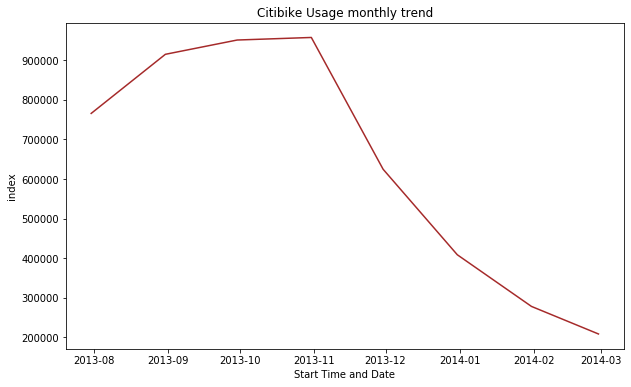

In [34]:
#creating vizualization
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot('Start Time and Date', 'index', data = line_chart, color='brown')
ax.set_title('Citibike Usage monthly trend', fontsize = 12)
# ax6.xaxis.set_major_locator(mdates.MonthLocator())
# ax6.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.show()

We can see how drastically is the Citibike Usage changing in respect to season. The arrival of colder months decreases dramatically the number of trips, which is to be expected. That said, we can say with certainty that temperature and weather conditions affect the Citibike usage. This parameter can be used for better predictions. 

#### 2. Number of Trips by Weekday

In [35]:
#preparing data
trips_weekdays=pd.DataFrame()
trips_weekdays['Weekday']=frame['Start Time and Date'].dt.weekday_name
trips_weekdays['Weekday']= pd.Categorical(trips_weekdays['Weekday'], 
                                          categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                          ordered=True)
trips_weekdays =trips_weekdays.groupby(['Weekday']).size().reset_index(name = 'Number of Trips')
trips_weekdays

,Weekday,Number of Trips
0,Monday,740999
1,Tuesday,772353
2,Wednesday,789702
3,Thursday,755580
4,Friday,763859
5,Saturday,670540
6,Sunday,616236


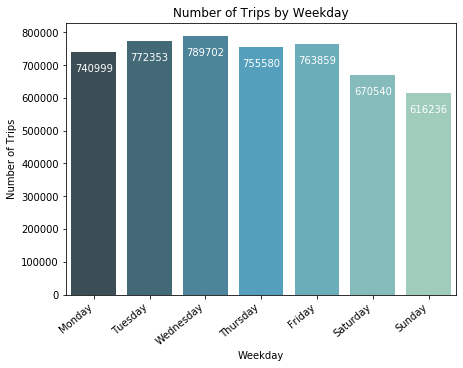

In [36]:
#creating vizualization
fig, ax2 = plt.subplots(figsize=(7, 5))
ax2 = sns.barplot('Weekday', 'Number of Trips', data = trips_weekdays, palette="GnBu_d")
ax2.set_title('Number of Trips by Weekday', fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40, ha = 'right')
for index, row in trips_weekdays.iterrows():
    ax2.text(index,row['Number of Trips']-60000,row['Number of Trips'], color='white', ha="center", fontsize = 10)
plt.show()

#### 3. Trip Duration by User Type

In [37]:
#calculating average trip duration by user type (in min)
TD_user = pd.DataFrame()
TD_user['Avg. Trip Duration'] = round(frame.groupby('User Type')['Minutes'].mean(),2)
TD_user = TD_user.reset_index()
TD_user['User Type'] = TD_user['User Type'].astype('object')

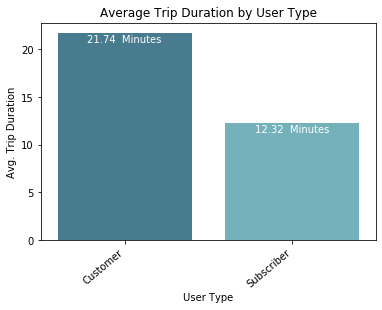

In [38]:
#creating vizualization
ax3 = sns.barplot('User Type', 'Avg. Trip Duration', data = TD_user,palette="GnBu_d")
ax3.set_title('Average Trip Duration by User Type')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=40, ha = 'right')
for index, row in TD_user.iterrows():
    ax3.text(row.name,row['Avg. Trip Duration']-1,(str(row['Avg. Trip Duration'])+"  Minutes"), 
             color='white', ha="center", fontsize = 10)
plt.show()

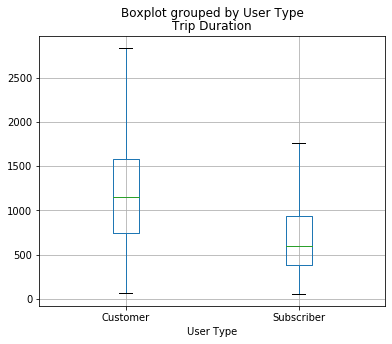

In [39]:
#boxplot without outliers
frame.boxplot('Trip Duration', by = 'User Type', showfliers=False,figsize=(6,5))
plt.show()

Given the difference in duration between the two groups, it’s safe to say that user type will be a strong predictor of trip duration when building the prediction model.

#### 4. Top 5 stations 

In [40]:
#data for Top 5 Stations visual
top5 = pd.DataFrame() 
top5['Station']=frame['Start Station Name'].value_counts().head().index
top5['Number of Starts']=frame['Start Station Name'].value_counts().head().values
top5['Station'] = top5['Station'].cat.remove_unused_categories()
top5['Station'] = top5['Station'].astype('object')
top5.sort_values(by = 'Number of Starts', ascending = False)

,Station,Number of Starts
0,Pershing Square N,53168
1,E 17 St & Broadway,50867
2,8 Ave & W 31 St,49998
3,Lafayette St & E 8 St,48856
4,Broadway & E 14 St,43200


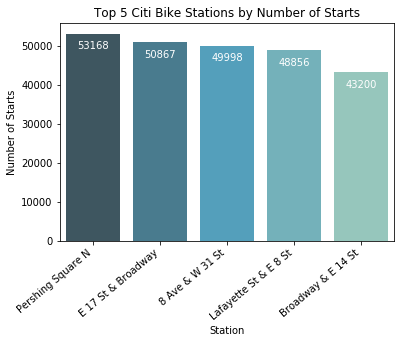

In [41]:
#vizualization
ax4 = sns.barplot('Station', 'Number of Starts', data = top5, palette="GnBu_d")
ax4.set_title('Top 5 Citi Bike Stations by Number of Starts', fontsize = 12)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top5.iterrows():
    ax4.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show()

In [42]:
#data for Top 5 Stations on map
top5['Latitude']=frame['Start Station Lat'].head().values
top5['Longitude']=frame['Start Station Long'].head().values
top5

,Station,Number of Starts,Latitude,Longitude
0,Pershing Square N,53168,40.753231,-73.970325
1,E 17 St & Broadway,50867,40.749718,-74.002950
2,8 Ave & W 31 St,49998,40.730287,-73.990765
3,Lafayette St & E 8 St,48856,40.718939,-73.992663
4,Broadway & E 14 St,43200,40.734927,-73.992005


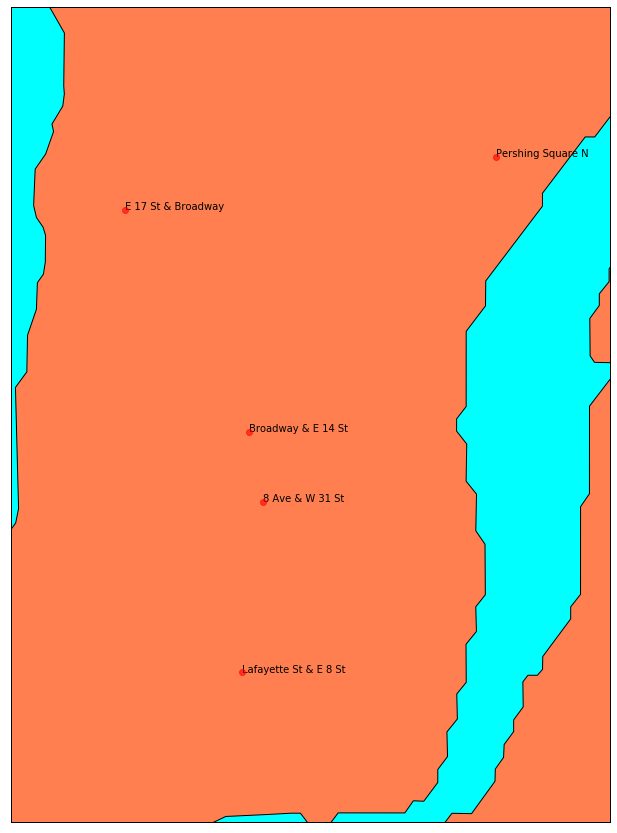

In [43]:
# initialize plot
fig, ax = plt.subplots(figsize=(15,15))

# prepare data for map
lat = list(top5['Latitude'])
lon = list(top5['Longitude'])
text = list(top5['Station'])
margin = 0.01 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='lcc',
            resolution = 'f',)

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua') 
m.drawrivers()

# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)

# plot points as red dots
ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6)
for i in range(top5.shape[0]):
    plt.text(lons[i], lats[i], text[i])
plt.show()

After vizualizing the top 5 stations on a map, we can see that they are all located in Manhattan. 

#### 5. Top 10 most popular trips 

In [44]:
#identifing the 10 most popular trips
top_trips = pd.DataFrame()
top_trips = frame.groupby(['Start Station Name','End Station Name']).size().reset_index(name = 'Number of Trips')
top_trips = top_trips.sort_values('Number of Trips', ascending = False)
top_trips["Start Station Name"] = top_trips["Start Station Name"].astype(str)
top_trips["End Station Name"] = top_trips["End Station Name"].astype(str)
top_trips["Trip"] = top_trips["Start Station Name"] + " to " + top_trips["End Station Name"]
top_trips = top_trips[:10]
top_trips = top_trips.drop(['Start Station Name', "End Station Name"], axis = 1)
top_trips = top_trips.reset_index()
top_trips

,index,Number of Trips,Trip
0,92938,2096,West Thames St to Vesey Pl & River Terrace
1,37453,2082,E 43 St & Vanderbilt Ave to W 41 St & 8 Ave
2,48303,1847,Grand Army Plaza & Central Park S to Broadway ...
3,91405,1779,Washington Square E to University Pl & E 14 St
4,76793,1708,W 17 St & 8 Ave to 8 Ave & W 31 St
5,43215,1702,E 7 St & Avenue A to Lafayette St & E 8 St
6,74670,1693,Vesey Pl & River Terrace to West Thames St
7,78569,1652,W 21 St & 6 Ave to W 22 St & 10 Ave
8,50254,1566,Greenwich St & N Moore St to Greenwich St & Wa...
9,19044,1486,Central Park S & 6 Ave to Broadway & W 60 St


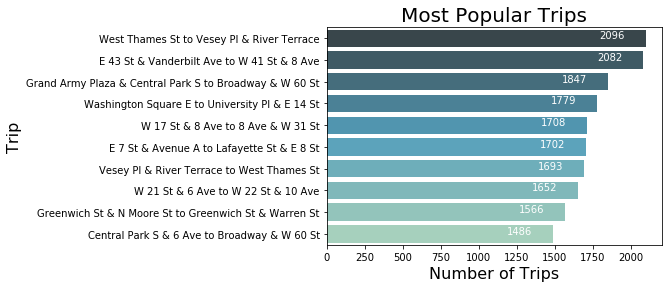

In [45]:
#creating vizualization
ax5 = sns.barplot('Number of Trips','Trip', data = top_trips,palette="GnBu_d")
ax5.set_title('Most Popular Trips', fontsize = 20)
ax5.set_ylabel("Trip",fontsize=16)
ax5.set_xlabel("Number of Trips",fontsize=16)
for index, row in top_trips.iterrows():
    ax5.text(row['Number of Trips']-220,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()

#### 6. Rider Performance by Gender and Age

We can calculate Rider performance by Gender and Age based on avg trip distance (station to station) and median speed (trip duration/distance traveled). As the data has been already cleaned, we can proceed.

In [46]:
#calculating age for anapysis purposes
frame['Age'] = 2020 - frame['Birth Year']
frame['Age'] = frame['Age'].astype(int)

In [47]:
#Dropping unknown from the gender column to make the visual more informative. 
#Unknown gender may be important for the model, which is why I created a copy of the original dataframe.
frame_1 = frame.drop(frame.index[(frame['Gender'] == 'Unknown')])

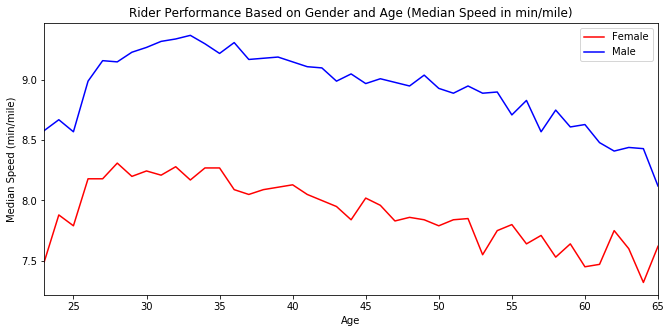

In [48]:
#Vizualization of performance by age and gender in km/h
fig, ax6 = plt.subplots(figsize=(11,5))
frame_1.groupby(['Age','Gender']).median()['Speed(km_hour)'].unstack().plot(ax=ax6, color ="rb")
ax6.legend(['Female','Male'])
plt.ylabel('Median Speed (min/mile)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in min/mile)')
plt.show()


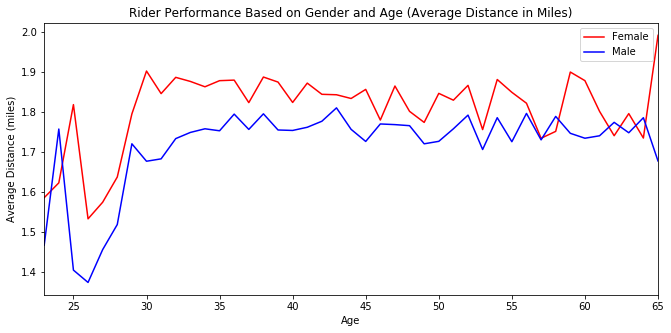

In [49]:
##Vizualization of performance by age and gender in averge distance
fig2, ax7 = plt.subplots(figsize=(11,5))
frame_1.groupby(['Age','Gender']).mean()['Distance'].unstack().plot(ax=ax7,color ="rb")
ax7.legend(['Female', 'Male'])
plt.ylabel('Average Distance (miles)')
plt.title('Rider Performance Based on Gender and Age (Average Distance in Miles)')
plt.show()

In [50]:
frame.head()

,Trip Duration,Start Time and Date,Stop Time and Date,Start Station ID,Start Station Name,Start Station Lat,Start Station Long,End Station ID,End Station Name,End Station Lat,End Station Long,Bike ID,User Type,Birth Year,Gender,Distance,Minutes,Speed(km_hour),index,Age
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,1983,Unknown,2.523943,10.566667,14.33,0,37
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,1983,Unknown,0.522639,25.783333,1.22,1,37
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,Female,0.341127,2.966667,6.90,2,40
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,1983,Unknown,5.656657,26.333333,12.89,3,37
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,Male,1.686989,12.616667,8.02,4,34


### Predictive Model

In this project I aim *to predict the duration of a trip based on distance given*. For service improvements, it would be great for Citibike to have an option where riders could be able to input their start and end destination and to get an estimate of their trip duration. 

For that we will try to use the most well-known and simple to interpret machine learning technique: Linear Regression. As we want to predict a continuous value, that is the most adequate regression algorithm to use. However, this is not the only assumptions that needs to be satified in order for us to be justified to use this particular algorithm. Therefore, we will effectuated some assumptions testing in the code below.

We will proceed as follows: 
1. choose the predictive variables based on which we will build a baseline model.
2. split the data in train/test sets and fit the model to our test data. 
3. depending on how the baseline model will perform, we will decide wether to try to improve it by adding further (engineered)independent variables.
4. proceed with assumptions testing.

##### Choose Predictive Variables 

As shown above, the variable **User Type** will be a strong predictor as the difference in trip duration between these two groups is considerable. Other predictors to be considered are **Gender** and **Age**. We can assume that when a user inputs the start and end station, they swipe their key fob (if they’re a subscriber) and enter their info on the kiosk (if they’re a “Customer”) prior to entering the start and end station. This means that we would know their gender and age. Thus these variables can be used in building the model.The trip duration in minutes from the **Minutes** column can be used instead of the **Trip Duration** variable and of course the **Distance** variable. 

*Update*: after testing a model with and without the Age variable, I found that this variable has no effect on the model, therefore we will remove it from the baseline model. 

All other variables are either irrelevant(e.g: Bike ID) or contain information that would not be available in real life(e.g.'Speed (km_h)') or provide information already found in the *chosen* variables (e.g: 'Trip Duration', 'Birth Year').

So, we will drop them from the model but first we will perform more data cleaning.

As mentioned above, riders incur additional fees if they surpass the 30 min (for *Customers*) and 45 min (for *Subscribers*) limits. To model our data, it does not make sense to include trips which last longer than the prescribed 45 minutes. Rider’s don’t often plan to go over the allocated time and there’s no clear way of knowing who plans to go over the allocated time. It’s a question worth exploring, however, the data is noise for our model, therefore we choose to drop these rows(64671~1,3% of data).

I was also planning to deal with the rows where gender is Unknown(619786~12% of data). However, replacing this category with the 'most common' one will add too much bias and variance into the model, thus, I have decided to let it be. Moreover, running a linear regression on a set without the Unknown gender doesn't result in a very different result anyways. 

In [51]:
#determining how many trips have exceeded the expected duration of 45 min 
print (len(frame[frame['Trip Duration'] > 2700]))

64671


In [52]:
#determining how many rows with Unknown gender do we have
print (len(frame[frame['Gender'] == 'Unknown']))

619786


In [53]:
frame.shape

(5109269, 20)

In [54]:
#cleaning up further anomalies
# we assume that no rider would plan to go over the maximum 45 minutes as this will end up it them being changed a fee
# we drop the rown with Unknown gender to simplify model
frame = frame.drop(frame.index[(frame['Trip Duration'] > 2700)])


In [55]:
#Let's work with a random sample of the data 
frame_sample = frame.sample(frac = 0.1, random_state = 0)
frame_sample.shape

(504460, 20)

In [56]:
#droping irrelevant data
def drop_data(df):
    df = df.drop(['Trip Duration', 'Start Time and Date', 'Stop Time and Date', 'Start Station ID', 'Start Station Name',
                  'Start Station Lat', 'Start Station Long', 'End Station ID', 'End Station Name', 'End Station Lat', 
                  'End Station Long', 'Bike ID', 'Birth Year', 'Speed(km_hour)', 'index', 'Age'], axis = 1)
    return df


frame_basemodel = drop_data(frame_sample)


In [57]:
#convert categorical data to numerical data
frame_basemodel['User Type'] = frame_basemodel['User Type'].astype('category').cat.codes
frame_basemodel['Gender'] = frame_basemodel['Gender'].astype('category').cat.codes
# one line code
# frame_basemodel = pd.get_dummies(frame_basemodel,columns=['Gender', 'User Type'], drop_first = True)
frame_basemodel

,User Type,Gender,Distance,Minutes
1739754,1,0,2.133267,23.083333
495310,1,1,1.096831,13.416667
1041595,1,1,4.905177,8.316667
4479751,1,1,0.474392,2.133333
5355683,1,1,3.770609,6.266667
...,...,...,...,...
3279190,1,0,1.718646,30.583333
4620370,1,1,4.663126,22.950000
1309756,1,1,1.231098,8.916667
5180175,1,1,0.738054,4.633333


#####  Split data into test/train and fit the linear regression

In [58]:
#splitting data
feature_cols = ['Distance', 'User Type', 'Gender']
X = frame_basemodel[feature_cols]
y = frame_basemodel['Minutes']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
#fitting Linear Regression 
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# checking accuracy using sklearn
base_model.score(X_test,y_test)

0.48482490702800224

In [61]:
#checking a statstics summary with Statsmodel
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
base_model_OLS = sm.OLS(y_train, X_train).fit()
base_model_OLS.summary()

C:\Users\Laurentia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 1.246e+05
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:42:02   Log-Likelihood:            -1.2900e+06
No. Observations:              403568   AIC:                         2.580e+06
Df Residuals:                  403564   BIC:                         2.580e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8734      0.056    245.692      0.000      13.763      13.984
Distance       4.0867      0.007    555.713      0.000       4.072       4.101
User Type     -7.8593      0.041   -191.660      0.000      -7.940      -7.779
Gender        -1.5768      0.023    -67.451      0.000      -1.623      -1.531
==============================================================================
Omnibus:                   118225.928   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           595640.151
Skew:                           1.333   Prob(JB):                         0.00
Kurtosis:                       8.321   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 value score is 0.48, meaning that only 48% of the variation in the data is explained by the regression line, meaning that only 48% of variance in the independent variable is explained by the chosen dependent variables. Of course, we aim for a R^2 score value closer to 1, thus, this result is a bit dissapointing. 

Now let's try to improve the baseline model by adding further independent variables.

##### Improving Model

We can add more variables describing the point in time the trips was made:
- whether the trip was made on a *weekday* or in the *weekend*. We have seen in the EDA(graph 2) performed that there are differences in the number of trips made.
- whether the trip was made in the *morning, afternoon, evening*, or *at night*. Adding further level of details could be good for our model.
- whether the trip was made in *winter*, *spring*, *summer*, or *autumn*. We have seen in the EDA(graph 1) that in the months of january, february, the number of trips decreased drastically comparing with the autumn months and not to mention summer months. 

In [62]:
def get_date_info(df):
    df['d_week'] = frame['Start Time and Date'].dt.dayofweek
    df['m_yr'] = frame['Start Time and Date'].dt.month
    df['ToD'] = frame['Start Time and Date'].dt.hour

    df['d_week'] = (df['d_week']<5).astype(int)

    df['m_yr'] = df['m_yr'].replace(to_replace=[12,1,2], value = 0)
    df['m_yr'] = df['m_yr'].replace(to_replace=[3,4,5], value = 1)
    df['m_yr'] = df['m_yr'].replace(to_replace=[6,7,8], value = 2)
    df['m_yr'] = df['m_yr'].replace(to_replace=[9,10,11], value = 3)
    
    df['ToD'] = pd.cut(df['ToD'], bins=[-1, 5, 9, 14, 20, 25], labels=['Night','Morning','Afternoon','Evening','Night1'])
    df['ToD'] = df['ToD'].replace(to_replace='Night1', value = 'Night')
    df['ToD'] = df['ToD'].cat.remove_unused_categories()
    
    df['m_yr'] = df['m_yr'].astype('category')
    df['d_week'] = df['d_week'].astype('category')

    return(df)

In [63]:
#preparing data for the second model
frame_basemodel1 = get_date_info(frame_sample)
frame_basemodel1 = drop_data(frame_basemodel1)

In [64]:
#deal with categorical data
# for column in X.columns:
#     if(frame_basemodel1[column].dtype == 'object'):
#         frame_basemodel1[column]= frame_basemodel1[column].astype('category')
#     frame_basemodel1[column] = frame_basemodel1[column].cat.codes
# frame_basemodel1 = pd.get_dummies(frame_basemodel1, drop_first = True)
frame_basemodel1['User Type'] = frame_basemodel1['User Type'].astype('category').cat.codes
frame_basemodel1['Gender'] = frame_basemodel1['Gender'].astype('category').cat.codes
frame_basemodel1['d_week'] = frame_basemodel1['d_week'].astype('category').cat.codes
frame_basemodel1['m_yr'] = frame_basemodel1['m_yr'].astype('category').cat.codes
frame_basemodel1['ToD'] = frame_basemodel1['ToD'].astype('category').cat.codes
frame_basemodel1

,User Type,Gender,Distance,Minutes,d_week,m_yr,ToD
1739754,1,0,2.133267,23.083333,1,1,3
495310,1,1,1.096831,13.416667,0,1,2
1041595,1,1,4.905177,8.316667,1,1,1
4479751,1,1,0.474392,2.133333,1,2,2
5355683,1,1,3.770609,6.266667,0,0,2
...,...,...,...,...,...,...,...
3279190,1,0,1.718646,30.583333,0,2,2
4620370,1,1,4.663126,22.950000,1,0,3
1309756,1,1,1.231098,8.916667,1,1,3
5180175,1,1,0.738054,4.633333,1,0,1


In [65]:
#splitting data
feature_cols = ['Distance', 'User Type', 'Gender', 'd_week', 'm_yr', 'ToD']
X = frame_basemodel1[feature_cols]
y = frame_basemodel1['Minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [66]:
#fittin Linear Regression and checking model2 accuracy 
base_model1 = LinearRegression()
base_model1.fit(X_train, y_train)
base_model1.score(X_test,y_test)

0.4880649000490535

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
base_model1_OLS = sm.OLS(y_train, X_train).fit()
base_mode1l_OLS.summary()

We do not see an improvement in the value of the R^2 score. Let's move further and test linear regression assumptions on this model. Maybe this machine learning technique it is not adequate for our data.

To be justified to use Linear regression algorithm for prediction, our model has to satisfy the following assumptions:
1. Linearity
2. Normality of the Error Terms
3. No Multicollinearity among Predictors
4. No Autocorrelation of the Error Terms
5. Homoscedasticity

Great detailed explanation [here](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/).

In [67]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [68]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\Laurentia\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


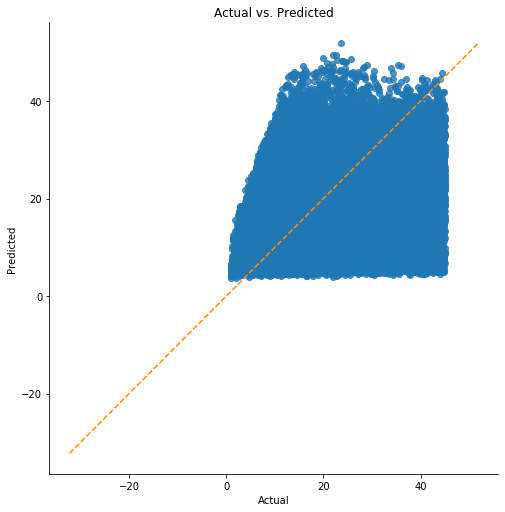

In [69]:
# testing assumption
linear_assumption(base_model1, X, y)

In [70]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


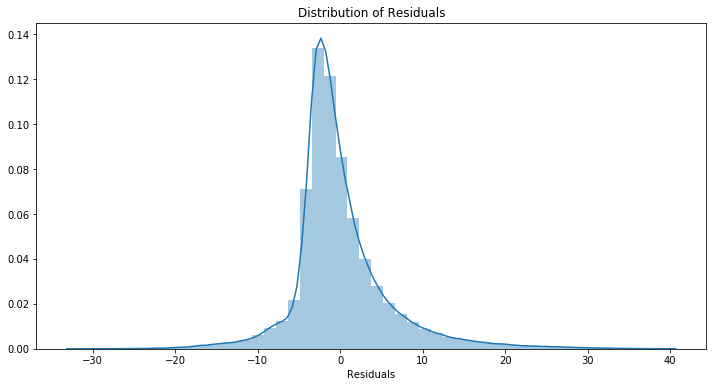


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [71]:
# testing assumption
normal_errors_assumption(base_model1,X, y)

This isn’t ideal, and we can see that our model is biasing towards under-estimating.

In [72]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

        

Assumption 3: Little to no multicollinearity among predictors


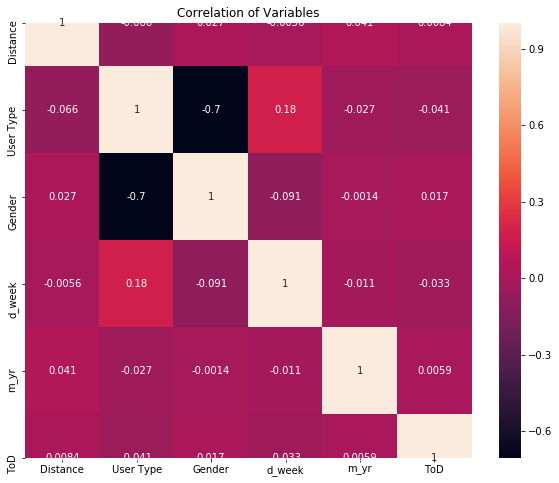

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Distance: 2.834691398598988
User Type: 6.072258448051025
Gender: 3.1605285804230934
d_week: 4.051712943403488
m_yr: 3.7510326728614376
ToD: 4.336220787039114

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [73]:
# testing assumption
multicollinearity_assumption(base_model1, X.values, y, X.columns)

In [74]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [75]:
# testing assumption
autocorrelation_assumption(base_model1, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9991863293175272
Little to no autocorrelation 

Assumption satisfied


In [76]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


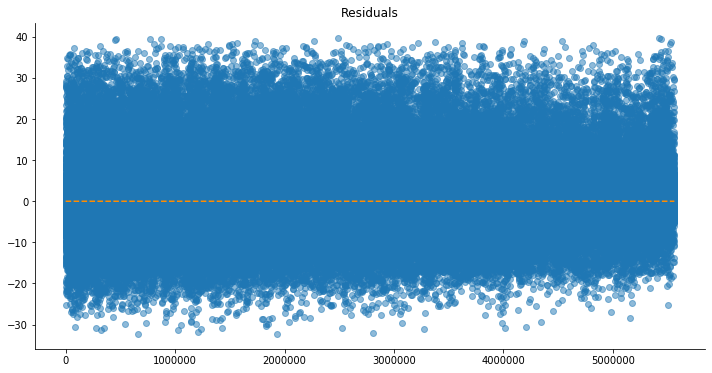

In [77]:
# testing assumption
homoscedasticity_assumption(base_model1, X, y)

As the baseline models didn't satify all the linear regression assumptions, I have decided to look into some others machine learning algorithms which can be used when the relationships between independant and dependant variables are non-linear. First, we will train the model by using **Random Forest Regression**, then we will assess the accuracy of the predictions.

In [79]:
# trying randomForest on the improved base_model1
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 80, random_state = 0, min_samples_leaf = 600)
regressor_rf.fit(X_train,y_train)
# checking accuracy
regressor_rf.score(X_test,y_test)

0.5163132501903329

Well, this model performs a bit better but still not ideal. Let's keep trying, this time with **XGBoost** algorithm.

In [80]:
#installing 
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
# trying xgboost on base_model1
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score

xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)
xg_reg.predict(X_test)
scores=cross_val_score(xg_reg, X_train, y_train)  

# checking accurancy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


C:\Users\Laurentia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


imrrove by adding more var, leanring curve, try xgbost, changing param for models, try learning curve and comment, finalize, how to choose best variables

 p value higher than 0.05 can mean  that we can not reject the null hypothesi, in the case of inear regression, that the slope for that specific X is 0. Thus, this mean that the X might have a slope of 0 which makes our var irrelevant for the model

increase sample size and training data size

Given the low accuracy of the baseline improved model, I have followed the following steps for improvement:
1. trying other algorithm
2. trying ensemble methods linke xgBoost
3. tunning algorithm parameters
4. increasing sample size and training data available
5. deal with Unknown gender?
6. feature selection